# Scale and Plot Painted JSON Annotations

This notebook reads in a sample image and plots annotated blobs from the corresponding JSON annotation file.  This assumes you have the main Kivy app set up on your android device and have annotated some images using the app with paint mode toggled on.  Be sure to copy over the proper JSON file from your device to the json folder before beginning.

In [1]:
import json
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from convert_json import convertPaint
%matplotlib inline

### Read in images and annotations

In [2]:
#image directory path
img_dir = '../test_images/'
json_name = 'test_images_paint.json'

In [3]:
#load annotation json
with open(json_name) as f:
    data = json.load(f)
    
#get all image names
img_names = [img_name for img_name,_ in data.items()]

In [4]:
#read in a sample image and corresponding annotation
n = 0
img_name = img_names[n]

img = plt.imread(img_dir+img_name)
annotation = data[img_name]['pixels']

### Plot image with blob annotations

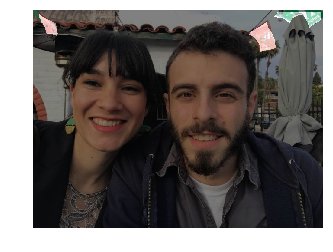

In [12]:
#plot image with annotations
fig,ax = plt.subplots(1)
ax.imshow(img)
ax.axis('off')

#get mask from json annotation
mask = np.zeros(img.shape[:2])
for _, pixels in annotation.items():
    mask += convertPaint(pixels,img.shape)

#display image with mask overlay
ax.imshow(mask, cmap='gray', alpha = .5)